# News Group Classification 

In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
path='mini_newsgroups'

folders=sorted(os.listdir(os.path.join(path))) 

df = pd.DataFrame(columns=['Text', 'Category'])
i = 0

for folder in folders:
    for file in os.listdir(os.path.join(path, folder)):
        with open(os.path.join(path, folder, file), encoding='latin-1') as f:
            df.loc[i, :] = [f.read(), folder]
            i += 1

In [3]:
df['CategoryId'] = df['Category'].factorize()[0]
df

,Text,Category,CategoryId
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,0
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19
1997,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19
1998,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19


In [4]:
# create a new pandas dataframe "category", which only has unique Categories
# also sorting this list in order of CategoryId values

category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,alt.atheism,0
100,comp.graphics,1
200,comp.os.ms-windows.misc,2
300,comp.sys.ibm.pc.hardware,3
400,comp.sys.mac.hardware,4
500,comp.windows.x,5
600,misc.forsale,6
700,rec.autos,7
800,rec.motorcycles,8
900,rec.sport.baseball,9


<BarContainer object of 20 artists>

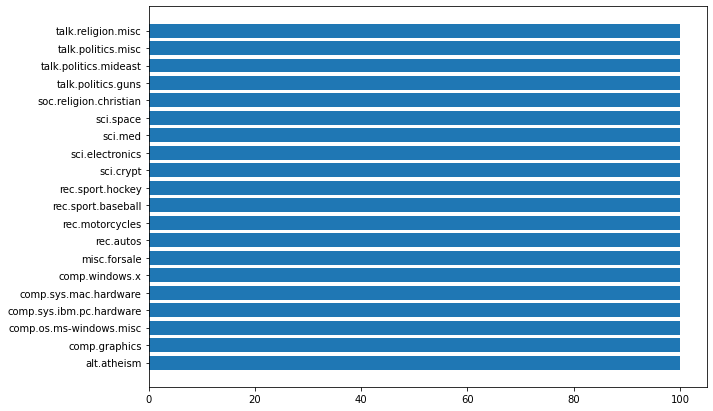

In [5]:
categories, counts = np.unique(df['Category'], return_counts=True)

fig = plt.figure(figsize =(10, 7))
plt.barh(categories, counts)

# Data pre-processing

In [6]:
stop = stopwords.words('english')
stop += ['writes', 'wrote', 'article']

for i in range(len(stop)):
    stop[i] = re.sub(r'\'', '', stop[i])
    
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [7]:
re_url_proto = re.compile(r'https?://(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&\/=]*)')

re_url_nonproto = re.compile(r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

re_email = re.compile(r'[\w.!#$%&\'*+/=?^_`{|}~-]+@(?:[\w-]+\.)+[\w-]{2,4}')



In [8]:
def pre_process(text):
    
    # clean header
    text = re.sub(r'(?i)(?:Xref|From|Subject|Reply-To|Date|Newsgroups|Message-ID|Lines|Path|Organization|References|Sender|NNTP-Posting-Host|Distribution|News-Software):[^\n]+\n', '', text)
    text = re.sub(r'Last-modified:[^\n]+\n', '', text)
    text = re.sub(r'Version:[^\n]+\n', '', text)
    
    # clean urls, mails
    text = re.sub(re_email, '', text)
    text = re.sub(re_url_proto, '', text)
    text = re.sub(re_url_nonproto, '', text)

    # clean spaces
    text = re.sub(r'[,.-]', ' ', text)
    text = re.sub(r'[\s]+', ' ', text)
    
    # clean punctuations, special characters and numbers
    text = re.sub(r'[^a-zA-Z ]', '', text)

    # convert to lower case
    text = text.lower()

    # remove stopwords
    words = text.split()
    text = [x for x in words if x not in stop and len(x)>2]

    # lemmatize words
    wordnet = WordNetLemmatizer()
    
    return ' '.join([wordnet.lemmatize(word) for word in text])

In [9]:
# example

eg = df.iloc[0, 0]
eg

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51121 soc.motss:139944 rec.scouting:5318\nNewsgroups: alt.atheism,soc.motss,rec.scouting\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!newsgate.watson.ibm.com!yktnews.watson.ibm.com!watson!Watson.Ibm.Com!strom\nFrom: strom@Watson.Ibm.Com (Rob Strom)\nSubject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"\nSender: @watson.ibm.com\nMessage-ID: <1993Apr05.180116.43346@watson.ibm.com>\nDate: Mon, 05 Apr 93 18:01:16 GMT\nDistribution: usa\nReferences: <C47EFs.3q47@austin.ibm.com> <1993Mar22.033150.17345@cbnewsl.cb.att.com> <N4HY.93Apr5120934@harder.ccr-p.ida.org>\nOrganization: IBM Research\nLines: 15\n\nIn article <N4HY.93Apr5120934@harder.ccr-p.ida.org>, n4hy@harder.ccr-p.ida.org (Bob McGwier) writes:\n\n|> [1] HOWEVER, I hate economic terrorism and political correctness\n|> worse than I hate this policy.  \n\n\n|> [2] A more effective

In [10]:
eg = pre_process(eg)
print(eg)

bob mcgwier however hate economic terrorism political correctness worse hate policy effective approach stop donating organizating directly indirectly support gay right issue end boycott funding scout somebody reconcile apparent contradiction rob strom ibm research saw mill river road box yorktown height


In [11]:
df['Text1'] = df['Text'].apply(pre_process)

In [12]:
df

,Text,Category,CategoryId,Text1
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,0,bob mcgwier however hate economic terrorism po...
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,keith ryan people keep asking question rarely ...
2,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,jon livesey long motto stay around becomes def...
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,robert beauchaine know capital punishment wron...
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0,brad porter science wonderful answering questi...
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19,herb huston wanted alice wonderland visit brit...
1996,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19,started reading newsgroup following thread cur...
1997,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19,blessed hunger thirst righteousness filled mat...
1998,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19,curious know christian ever read book based cr...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        2000 non-null   object
 1   Category    2000 non-null   object
 2   CategoryId  2000 non-null   int64 
 3   Text1       2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 142.7+ KB


In [14]:
unq_words, counts = np.unique(' '.join(df['Text1']).split(), return_counts=True)

len(unq_words)

30065

In [15]:
vocab = dict(zip(unq_words, counts))

sorted_vocab = sorted(vocab.items(), key=lambda x:x[1], reverse=True)

unq_words = [x[0] for x in sorted_vocab]
counts = [x[1] for x in sorted_vocab]

In [16]:
f_words = []
n_words = []
for f in sorted(np.unique(counts), reverse=True):
    f_words.append(f)
    n_words.append(counts.count(f))

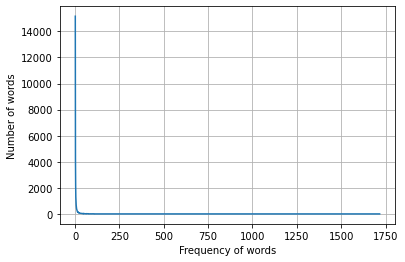

In [17]:
# fig = plt.figure(figsize =(10, 7))
# plt.xlim(0,50)
# plt.xlim(0,250)
plt.ylabel("Number of words")
plt.xlabel("Frequency of words")
plt.plot(f_words, n_words)
plt.grid()
plt.show()

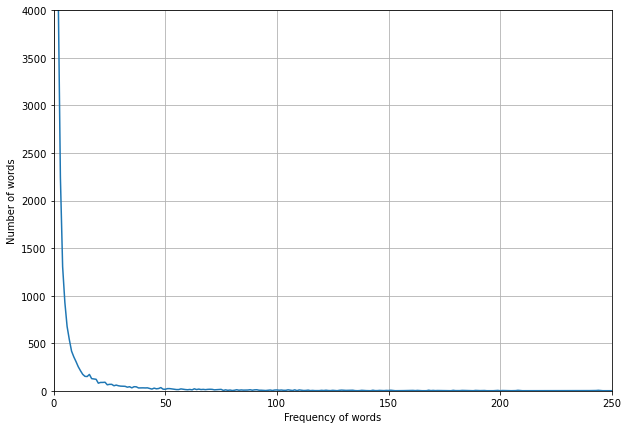

In [18]:
fig = plt.figure(figsize =(10, 7))
plt.xlim(0,250)
plt.ylim(0,4000)
plt.ylabel("Number of words")
plt.xlabel("Frequency of words")
plt.plot(f_words, n_words)
plt.grid()
plt.show()

In [19]:
# filter the vocabulary to remove high frequency words and low frequency words

vocab = []

for i in range(len(unq_words)):
    if counts[i] >= 5 and counts[i] <= 150:
        vocab.append(unq_words[i])

def remove_words(text):
    words = text.split()
    text = [x for x in words if x in vocab]
    return ' '.join(text)

In [20]:
n_feat = len(vocab)
n_feat

6854

In [21]:
df['Text2'] = df['Text1'].apply(remove_words)
df

,Text,Category,CategoryId,Text1,Text2
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,0,bob mcgwier however hate economic terrorism po...,bob hate economic terrorism political correctn...
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,keith ryan people keep asking question rarely ...,keith ryan asking rarely nope answered posed a...
2,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,jon livesey long motto stay around becomes def...,jon livesey motto stay becomes default wheres ...
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0,robert beauchaine know capital punishment wron...,robert beauchaine capital punishment shooting ...
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0,brad porter science wonderful answering questi...,brad wonderful answering scientific finding of...
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19,herb huston wanted alice wonderland visit brit...,herb wanted visit british museum manuscript co...
1996,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,19,started reading newsgroup following thread cur...,started reading newsgroup thread curious threa...
1997,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19,blessed hunger thirst righteousness filled mat...,blessed filled matthew
1998,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,talk.religion.misc,19,curious know christian ever read book based cr...,curious critique religion classical text age m...


## Create and Fit Bag of Words Model

In [22]:
%%time

X = pd.DataFrame(columns = vocab)

for i in range(df.shape[0]):
    X.loc[i] = np.zeros(n_feat)
    u_words, counts = np.unique(df.loc[i, 'Text2'].split(), return_counts=True)
    for feat in vocab:
        if feat in u_words:
            X.loc[i, feat] = counts[np.where(u_words==feat)]
            
X

<timed exec>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
<timed exec>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
<timed exec>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


CPU times: total: 2min 26s
Wall time: 2min 35s


,away,comment,matter,ago,large,research,service,argument,effect,board,...,xga,xlh,xmtextfield,xtoswindowservercolor,xvision,yeastfungus,yep,younger,zinc,zucker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y = df['CategoryId']
y

0        0
1        0
2        0
3        0
4        0
        ..
1995    19
1996    19
1997    19
1998    19
1999    19
Name: CategoryId, Length: 2000, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

X_train

,away,comment,matter,ago,large,research,service,argument,effect,board,...,xga,xlh,xmtextfield,xtoswindowservercolor,xvision,yeastfungus,yep,younger,zinc,zucker
1738,0.0,1.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
548,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int64),
 array([79, 78, 71, 68, 68, 69, 77, 76, 82, 75, 81, 79, 79, 75, 73, 73, 69,
        77, 78, 73], dtype=int64))

## Implementation of Naive Bayes

In [26]:
class NaiveBayesText:
    def __init__(self):
        self.prior_prob = dict()
        self.likelihoods = dict()
        
    def find_prior_probs(self, y):
        self.classes, self.counts = np.unique(y, return_counts=True) 
        
        for i in range(len(self.classes)):
            self.prior_prob[self.classes[i]] = np.log(self.counts[i]) - np.log(self.n_exam)
        
    def find_likelihoods(self, X, y):
        for clas in self.classes: 
            X_class = X[y == clas]
            X_class.reset_index(inplace=False)
            
            n = X_class.values.sum()
            
            self.likelihoods[clas] = []
            
            for feat in self.features:
                n_k = np.sum(X_class.loc[:, feat])
                
                likelihood = np.log(n_k + 1) - np.log(n + self.n_feat)
                
                self.likelihoods[clas].append(likelihood)
    
    def target_function(self, query):
        result = None
        target = None
        for class_ in self.classes:
            post_prob = self.prior_prob[class_]
            
            for i in range(self.n_feat):
                if query[i] != 0:
                    post_prob += self.likelihoods[class_][i] * query[i]
            
            if result == None or post_prob > result:
                result = post_prob
                target = class_
            
        return target
    
    def predict(self, queries):
        y_pred = []
        for i in range(queries.shape[0]):
            query = list(queries.iloc[i])
            target = self.target_function(query)
            y_pred.append(target)
        return y_pred
        
    
    def accuracy(self, y, y_pred):
        count = 0
        y = list(y)
        for i in range(len(y)):
            if (y[i] == y_pred[i]):
                count += 1
        accuracy = (count/len(y))*100
        return accuracy
    
    def fit(self, X, y):
        self.features = X.keys()
        self.n_feat = X.shape[1]
        self.n_exam = X.shape[0]
        self.find_prior_probs(y)
        self.find_likelihoods(X, y)        

In [27]:
%%time

from sklearn.model_selection import train_test_split

nbt = NaiveBayesText()

nbt.fit(X_train, y_train)

y_pred_tr = nbt.predict(X_train)

accuracy_tr = nbt.accuracy(y_train, y_pred_tr)
print('\nAccuracy for train data:', accuracy_tr, '%')

y_pred_te = nbt.predict(X_test)

accuracy_te = nbt.accuracy(y_test, y_pred_te)
print('\nAccuracy for test data:', accuracy_te, '%')


Accuracy for train data: 95.93333333333334 %

Accuracy for test data: 64.8 %
CPU times: total: 52.7 s
Wall time: 53.6 s


## Using in built function

In [28]:
%%time

#from inbuilt function

from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()
clf.fit(X_train, y_train)

y_pr_te = clf.predict(X_test)

score_tr = clf.score(X_train, y_train)
print('Accuracy on train data:', score_tr*100, '%')

score_te = clf.score(X_test, y_test)
print('Accuracy on test data:', score_te*100, '%')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on train data: 95.93333333333334 %
Accuracy on test data: 64.8 %
CPU times: total: 719 ms
Wall time: 456 ms


## Using countvectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

y = np.array(df.CategoryId.values)
cv = CountVectorizer()
x = cv.fit_transform(df.Text2).toarray()
print("X.shape =", x.shape)
print("y.shape =", y.shape)

X.shape = (2000, 6854)
y.shape = (2000,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1400
600


In [39]:
clf1 = MultinomialNB()
clf1.fit(x_train, y_train)

y_pr_te = clf1.predict(x_test)

score_tr = clf1.score(x_train, y_train)
print('Accuracy on train data:', score_tr*100, '%')

score_te = clf1.score(x_test, y_test)
print('Accuracy on test data:', score_te*100, '%')

Accuracy on train data: 95.57142857142857 %
Accuracy on test data: 67.66666666666666 %


## Using TF-IDF vectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

y = np.array(df.CategoryId.values)
tfidfV = TfidfVectorizer()
x = tfidfV.fit_transform(df.Text2)

print(x.shape)
print(type(x))

(2000, 6854)
<class 'scipy.sparse.csr.csr_matrix'>


In [45]:
x = pd.DataFrame(x.todense())
x.columns = sorted(tfidfV.vocabulary_)
x

,aaa,aaron,abandoned,abbott,abc,abiding,ability,aboard,abort,abortion,...,zinc,zionism,zionist,zip,zone,zoology,zoom,zoroastrian,zoroastrianism,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1400
600


In [47]:
clf2 = MultinomialNB()
clf2.fit(x_train, y_train)

y_pr_te = clf2.predict(x_test)

score_tr = clf2.score(x_train, y_train)
print('Accuracy on train data:', score_tr*100, '%')

score_te = clf2.score(x_test, y_test)
print('Accuracy on test data:', score_te*100, '%')

Accuracy on train data: 98.21428571428571 %
Accuracy on test data: 64.83333333333333 %
